In [60]:
from keras.datasets import reuters

In [61]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [62]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [63]:
word_index=reuters.get_word_index()

In [64]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [65]:
decoded_newswire=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [66]:
import numpy as np
 
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)


In [67]:
from keras.utils.np_utils import to_categorical

In [68]:
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [69]:
from keras import models
from keras import layers

In [70]:
model=models.Sequential()

In [71]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [72]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [74]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,validation_data=(x_val,y_val),batch_size=512)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 179us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


In [76]:
# plotting the training and validation loss
import matplotlib.pyplot as plt

In [79]:
loss=history.history['loss']
val_loss=history.history['val_loss']

In [81]:
epochs=range(1,len(loss)+1)

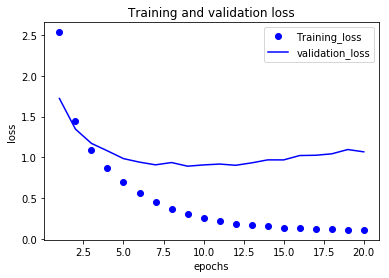

In [84]:
plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='validation_loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [85]:
plt.clf()


<Figure size 432x288 with 0 Axes>

In [86]:
acc=history.history['acc']

In [87]:
val_acc=history.history['val_acc']

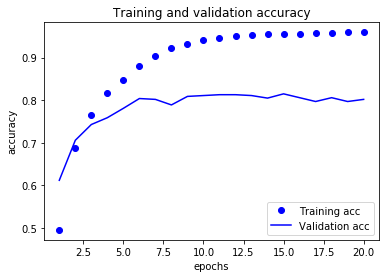

In [88]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [93]:
# train for 9 epochs after 9 epochs network starts to overfit
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [95]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [96]:
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 157us/step - loss: 2.6248 - acc: 0.5416 - val_loss: 1.7422 - val_acc: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 134us/step - loss: 1.4396 - acc: 0.6946 - val_loss: 1.3270 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 134us/step - loss: 1.0719 - acc: 0.7695 - val_loss: 1.1319 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.8387 - acc: 0.8260 - val_loss: 1.0344 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.6727 - acc: 0.8576 - val_loss: 0.9511 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 134us/step - loss: 0.5437 - acc: 0.8857 - val_loss: 0.9170 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.4350 - acc: 0.9092 - val_loss: 0.8809 - val_acc: 0.8210
Epoch 8

In [97]:
results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 220us/step


In [98]:
results

[0.96051529657596579, 0.78895814787141993]

In [99]:
predictions=model.predict(x_test)

In [102]:
predictions[0].shape

(46,)